In [1]:
# Install required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Read the two files
df1 = pd.read_csv('/content/hfm_10cols.csv')
df2 = pd.read_csv('/content/hfm_14cols.csv')
df3 = df2.drop(columns = ['Unnamed: 14','Unnamed: 15','label','time'])
df = pd.concat([df1,df3], axis=1)
df = df[['time','failure_label','sensor_1','sensor_2','sensor_3','sensor_4','sensor_5','sensor_6','sensor_7','sensor_8','sensor_9','sensor_10','sensor_11','sensor_12','sensor_13','sensor_14','sensor_15','sensor_16','sensor_17','sensor_18','sensor_19','sensor_20']]
df['time'] = pd.to_datetime(df['time'])

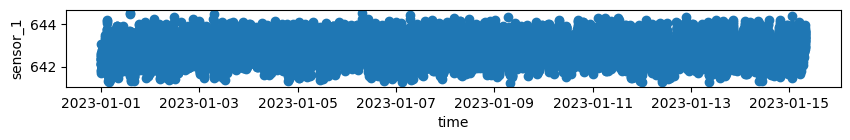

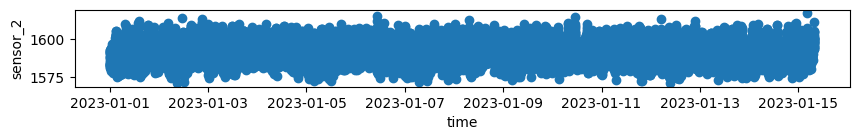

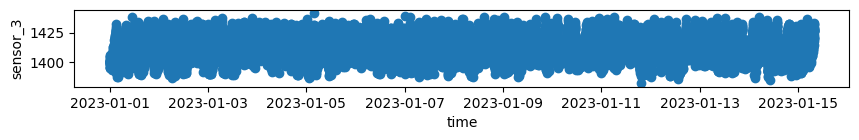

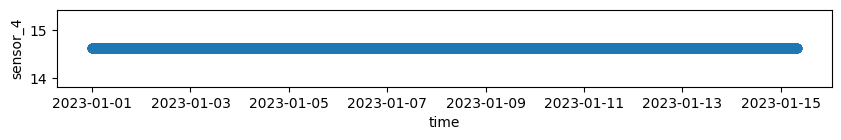

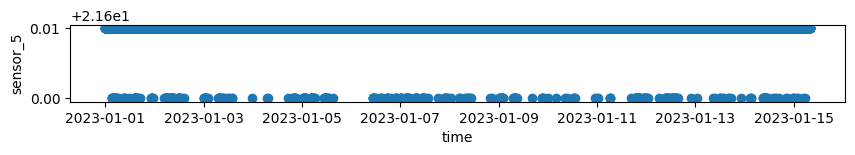

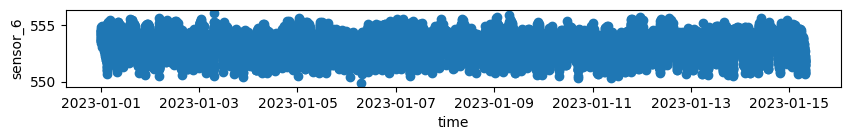

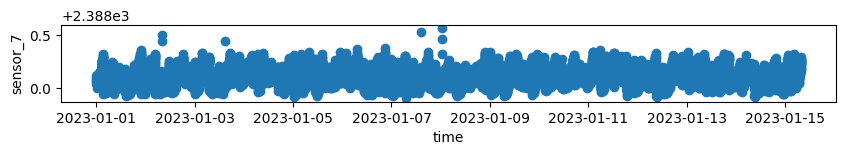

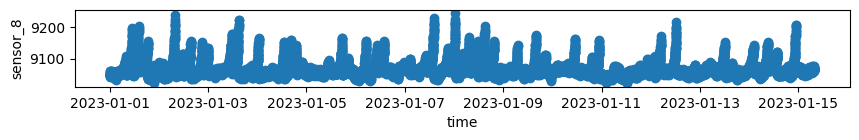

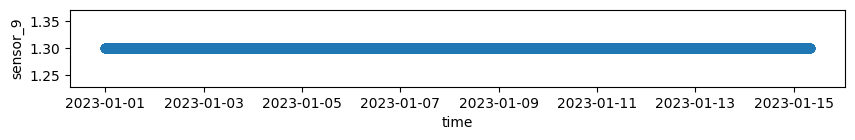

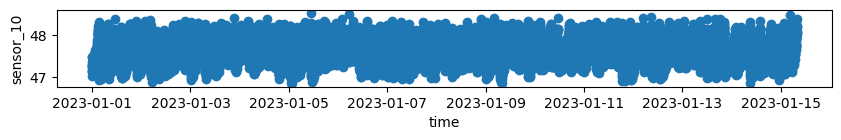

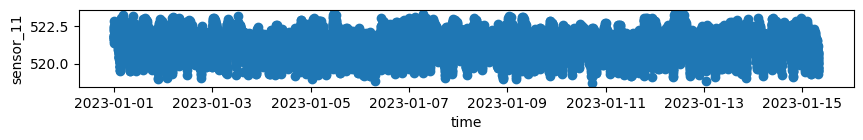

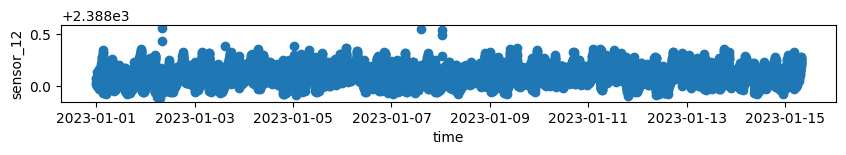

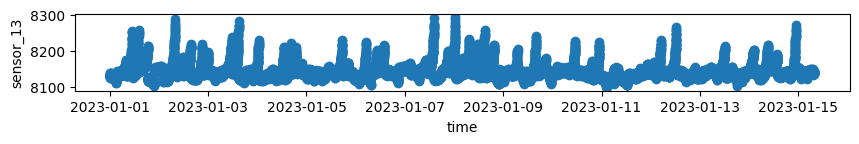

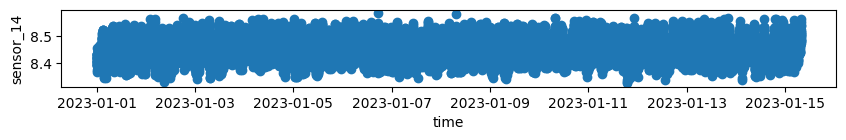

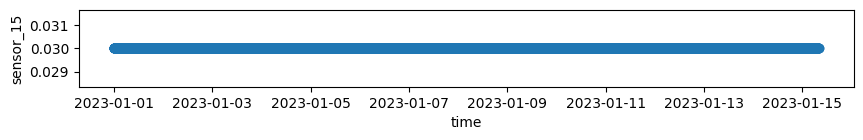

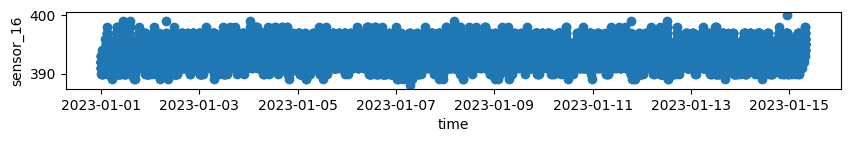

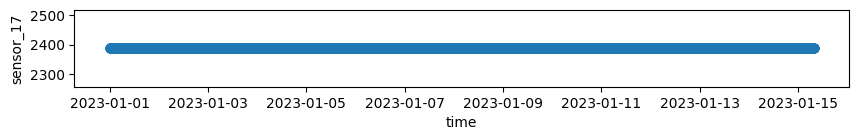

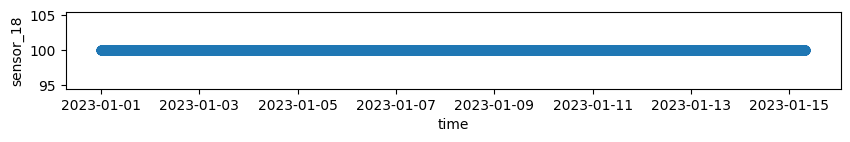

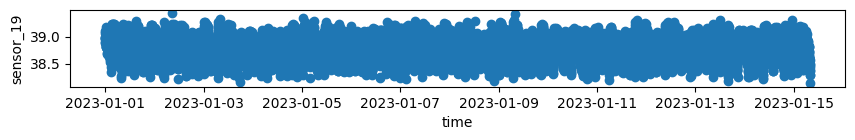

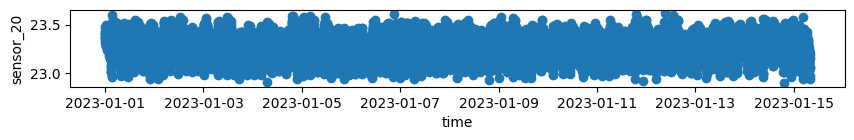

In [3]:
# Plotting the data
for col in df.columns[2:]:
    plt.rcParams['figure.figsize'] = [10,1]
    plt.scatter(df['time'],df[col])
    plt.xlabel('time')
    plt.ylabel(col)
    plt.show()

In [4]:
# Based on summary statistics dropping the sensor 4,5,9,15,17 and 18
df = df.drop(columns = ['sensor_4','sensor_5','sensor_9','sensor_15','sensor_17','sensor_18'])
df_normal = df[df['failure_label']==0]
df_failure = df[df['failure_label']==1]
# Train and test data
X_train = df_normal.iloc[:,2:]
X_fault = df_failure.iloc[:,2:]
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_fault)

In [5]:
# Liner PCA model
pca_redunction = PCA(n_components=10) # 90% variance in the data is captured, n_components=0.9
X_train_pca = pca_redunction.fit_transform(X_train_scaled)
X_test_pca = pca_redunction.transform(X_test_scaled)

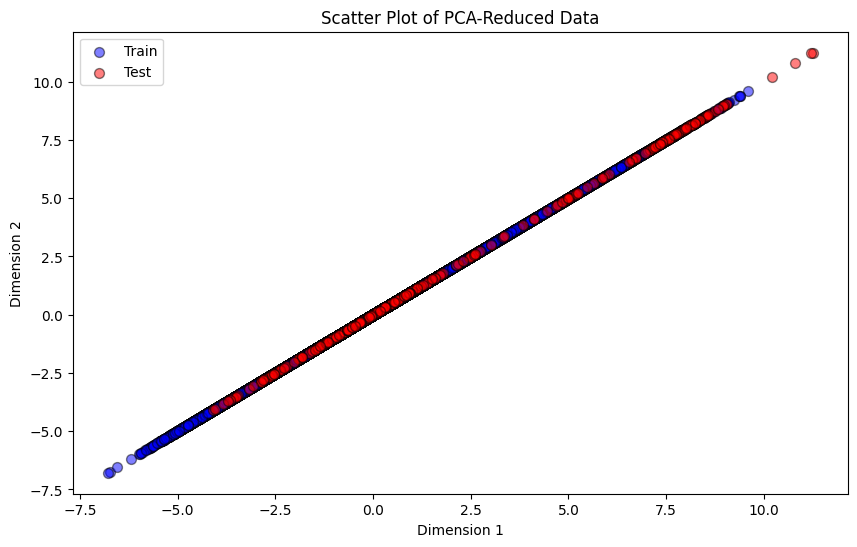

In [6]:
# Increase the figure size
plt.figure(figsize=(10, 6))
# Scatter plot for training data
plt.scatter(X_train_pca, X_train_pca, c='blue', label='Train', edgecolor='black',alpha=0.5, s=50)

# Scatter plot for test data
plt.scatter(X_test_pca, X_test_pca, c='red', label='Test', edgecolor='black',alpha=0.5, s=50)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.title('Scatter Plot of PCA-Reduced Data')

plt.show()

In [7]:
# # Function to obtain reconstruction loss
def recon_loss(pca,X):
    #'pca' is the alredy fitted model on the "Fault-Free" data
    X_pca = pca.transform(X)
    X_recon = pca.inverse_transform(X_pca)
    reconstruction_loss = np.mean((X-X_recon)**2,axis=1)
    return reconstruction_loss

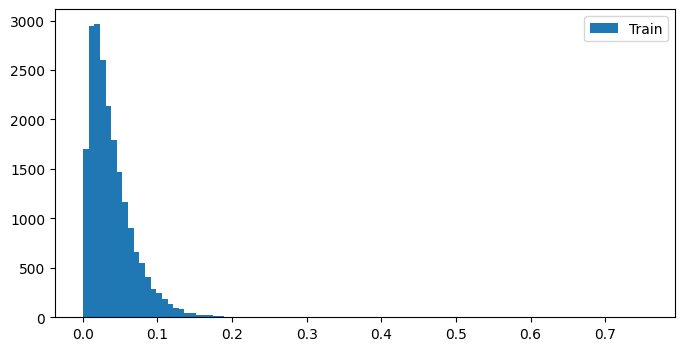

In [8]:
# Histogram for the reconstruction loss of the Fault Free data
Training_reconstruction_loss = recon_loss(pca=pca_redunction,X=X_train_scaled)
plt.figure(figsize=(8, 4))
plt.hist(Training_reconstruction_loss, bins=100,label='Train',alpha=1)
# plt.xlim([0,80])
plt.legend()
plt.show()

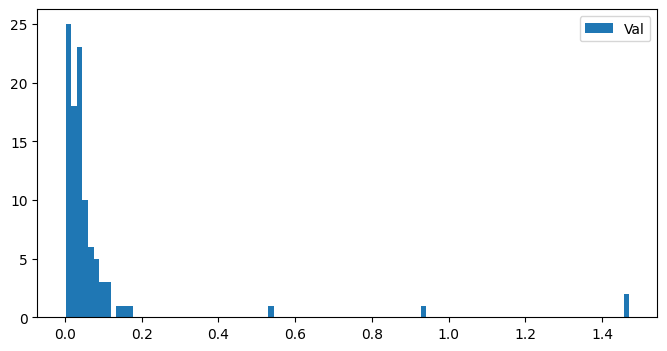

In [9]:
# Histogram for the reconstruction loss of the Faulty data
Validation_reconstruction_loss = recon_loss(pca=pca_redunction,X=X_test_scaled)
plt.figure(figsize=(8, 4))
plt.hist(Validation_reconstruction_loss, bins=100,label='Val',alpha=1)
# plt.xlim([0,80])
plt.legend()
plt.show()

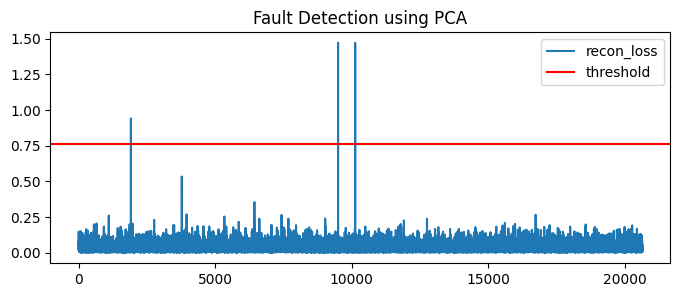

In [10]:
# Histogram for the reconstruction loss of the Faulty data
threshold = round(max(Training_reconstruction_loss),2)
EntireData = df.iloc[:,2:]
EntireData_scaled = sc.transform(EntireData)
EntireData_reconstruction_loss = recon_loss(pca=pca_redunction,X=EntireData_scaled)

plt.rcParams['figure.figsize'] = [8, 3]
plt.plot(EntireData_reconstruction_loss,label=f'recon_loss')
plt.axhline(threshold,c='r',label='threshold')    #threshold value

plt.title(f'Fault Detection using PCA')
plt.legend()
plt.show()

In [11]:
# Counting number of samples above threshold
mask = np.array(EntireData_reconstruction_loss) >= threshold
count_true = np.sum(mask)
indices = np.where(mask)
selected_rows = df.iloc[indices]
selected_rows.shape[0]

3

In [13]:
# Counting number of faults detected by model
(selected_rows.shape[0]-(sum(selected_rows['failure_label'] == 0)))

3

In [14]:
Accuarcy = (selected_rows.shape[0]-(sum(selected_rows['failure_label'] == 0))) / selected_rows.shape[0]
Accuarcy

1.0